# Machine Learning Adopted Human Activity Classification using Shimmer Wearable Sensors for Health Monitoring

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import os
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('dataset.csv')

In [5]:
df.head()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,activity
0,39.25,0.43,22.75,0.43,33.75,1.3,bending1
1,39.25,0.43,23.00,0.00,33.00,0.0,bending1
2,39.25,0.43,23.25,0.43,33.00,0.0,bending1
3,39.50,0.50,23.00,0.71,33.00,0.0,bending1
4,39.50,0.50,24.00,0.00,33.00,0.0,bending1


In [6]:
df.shape

(2399, 7)

In [7]:
df['activity'].unique()

array(['bending1', 'cycling', 'sitting', 'standing', 'walking'],
      dtype=object)

In [8]:
df.describe()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
count,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000
mean,39.356603,1.545556,16.639045,1.675340,18.230225,1.809721
std,4.517858,1.935654,3.587179,1.693525,9.095739,1.673722
min,19.330000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.750000,0.430000,14.500000,0.430000,12.000000,0.500000
50%,40.500000,0.640000,16.750000,1.090000,16.330000,1.300000
75%,42.750000,2.120000,18.750000,2.500000,20.500000,2.600000
max,48.000000,14.500000,29.500000,9.000000,38.250000,9.740000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   avg_rss12  2399 non-null   float64
 1   var_rss12  2399 non-null   float64
 2   avg_rss13  2399 non-null   float64
 3   var_rss13  2399 non-null   float64
 4   avg_rss23  2399 non-null   float64
 5   var_rss23  2399 non-null   float64
 6   activity   2399 non-null   object 
dtypes: float64(6), object(1)
memory usage: 131.3+ KB


In [10]:
df.isnull().sum()

avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
activity     0
dtype: int64

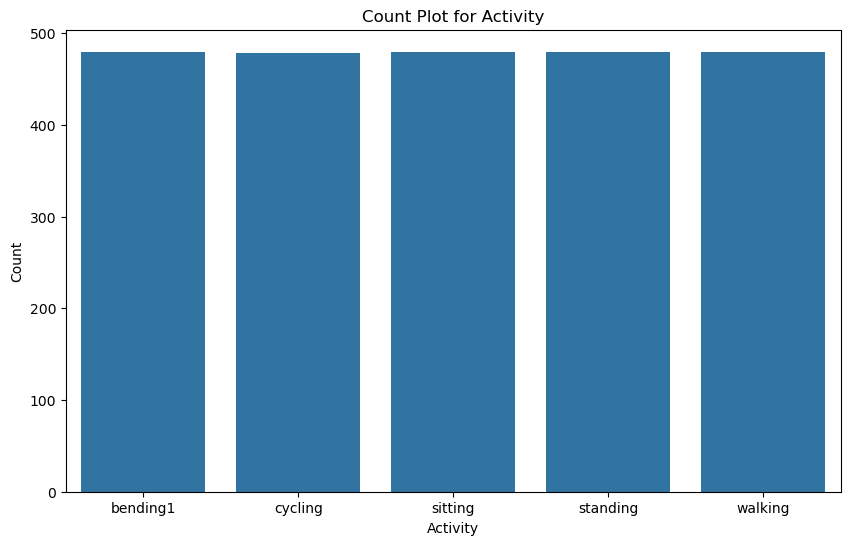

In [11]:
# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='activity')
plt.title('Count Plot for Activity')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()

In [12]:
# Resample the DataFrame to have 10,000 samples
df_resampled = resample(df, replace=True, n_samples=10000, random_state=42)

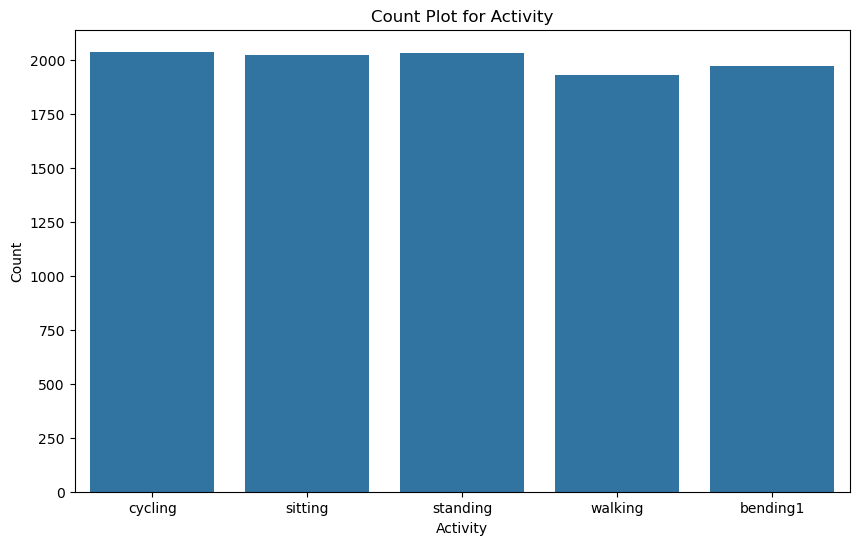

In [13]:
# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_resampled, x='activity')
plt.title('Count Plot for Activity')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()

In [14]:
label_encoder = LabelEncoder()
# Fit and transform the activity column
df_resampled['activity'] = label_encoder.fit_transform(df_resampled['activity'])

In [15]:
df_resampled.head()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,activity
860,33.00,0.00,18.0,0.82,17.50,2.50,1
1294,43.25,0.83,17.0,0.71,17.75,0.43,2
1130,43.50,0.50,20.0,0.00,11.67,0.47,2
1095,43.75,0.43,18.0,0.00,11.00,0.82,2
1638,44.75,0.43,15.0,0.00,7.33,1.70,3


In [16]:
df_resampled.shape

(10000, 7)

In [17]:
df_resampled['activity'].unique()

array([1, 2, 3, 4, 0])

In [18]:
# Specifying dependent and independent variables

In [19]:
# Separate features and target
X = df_resampled.drop('activity', axis=1)
y = df_resampled['activity']

In [20]:
print("Length of X:", len(X))
print("Length of y:", len(y))

Length of X: 10000
Length of y: 10000


In [21]:
X

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
860,33.00,0.00,18.00,0.82,17.50,2.50
1294,43.25,0.83,17.00,0.71,17.75,0.43
1130,43.50,0.50,20.00,0.00,11.67,0.47
1095,43.75,0.43,18.00,0.00,11.00,0.82
1638,44.75,0.43,15.00,0.00,7.33,1.70
...,...,...,...,...,...,...
2028,29.50,7.79,16.75,1.48,8.75,4.26
362,39.00,0.00,20.75,0.43,36.25,0.43
2318,35.00,7.65,14.00,0.82,16.00,4.42
2345,37.25,2.86,20.50,1.50,17.00,3.67


In [22]:
y

860     1
1294    2
1130    2
1095    2
1638    3
       ..
2028    4
362     0
2318    4
2345    4
233     0
Name: activity, Length: 10000, dtype: int32

In [23]:
# Data Splitting

In [24]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=77 )

In [25]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [26]:
X_train ,y_train = smote.fit_resample(X_train,y_train) 

In [27]:
X_train.shape

(8220, 6)

In [28]:
y_train.shape

(8220,)

In [29]:
labels = ['bending', 'cycling', 'sitting', 'standing', 'walking']  # The corresponding names for the labels

In [30]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [31]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, testY,predict):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 

    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

# GradientBoostingClassifier

Model loaded successfully.
GradientBoostingClassifier Accuracy    : 92.25
GradientBoostingClassifier Precision   : 92.14734847969834
GradientBoostingClassifier Recall      : 92.18644819641413
GradientBoostingClassifier FSCORE      : 92.15097448923495

 GradientBoostingClassifier classification report
               precision    recall  f1-score   support

     bending       1.00      1.00      1.00       422
     cycling       0.87      0.91      0.89       395
     sitting       0.91      0.90      0.90       392
    standing       0.91      0.92      0.92       392
     walking       0.91      0.88      0.90       399

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



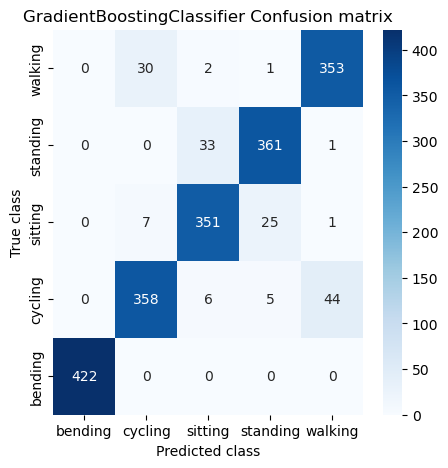

In [33]:
if os.path.exists('model/GradientBoostingClassifier.pkl'):
    # Load the trained model from the file
    gbb = joblib.load('model/GradientBoostingClassifier.pkl')
    print("Model loaded successfully.")
    predict = gbb.predict(X_test)
    calculateMetrics("GradientBoostingClassifier", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    gbb = GradientBoostingClassifier()
    gbb.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(gbb, 'model/GradientBoostingClassifier.pkl')
    print("Model saved successfully.")
    predict = gbb.predict(X_test)
    calculateMetrics("GradientBoostingClassifier", predict, y_test)

# XGBClassifier

Model loaded successfully.
XGBClassifier Accuracy    : 99.55000000000001
XGBClassifier Precision   : 99.54209891818152
XGBClassifier Recall      : 99.54222674893546
XGBClassifier FSCORE      : 99.54209833713549

 XGBClassifier classification report
               precision    recall  f1-score   support

     bending       1.00      1.00      1.00       422
     cycling       1.00      1.00      1.00       395
     sitting       0.99      0.99      0.99       392
    standing       0.99      0.99      0.99       392
     walking       1.00      1.00      1.00       399

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



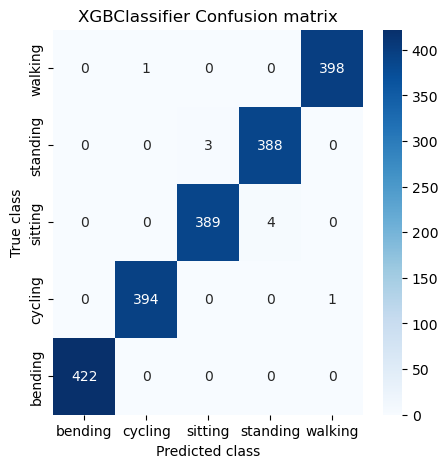

In [35]:
if os.path.exists('model/XGBClassifier.pkl'):
    # Load the trained model from the file
    xgbc = joblib.load('model/XGBClassifier.pkl')
    print("Model loaded successfully.")
    predict = xgbc.predict(X_test)
    calculateMetrics("XGBClassifier", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    xgbc = XGBClassifier()
    xgbc.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(xgbc, 'model/XGBClassifier.pkl')
    print("Model saved successfully.")
    predict = xgbc.predict(X_test)
    calculateMetrics("XGBClassifier", predict, y_test)


In [36]:
test = pd.read_csv('test.csv')

In [37]:
#dataset = dataset.fillna(0)
object_cols1 = test.select_dtypes(include=['object']).columns
test[object_cols1] = test[object_cols1].fillna('Unknown')

# Apply Label Encoding to each object column
label_encoders = {}
for col in object_cols1:
    # Fill null values with a placeholder, e.g., 'Unknown'
#    dataset[col] = dataset[col].fillna('Unknown')
    test = test.fillna(0)
    # Initialize and fit the LabelEncoder
    le = LabelEncoder()
    test[col] = le.fit_transform(test[col])
    
    # Store the label encoder for future use
    label_encoders[col] = le

# Display the transformed dataset
print("Transformed Dataset:")
print(test)

Transformed Dataset:
    avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0       43.00       0.71      20.33       0.47       8.50       1.50
1       43.25       0.83      26.00       0.71      30.00       0.00
2       40.25       1.30      16.50       0.87       6.75       2.28
3       25.25       2.28      18.00       2.94      18.67       3.30
4       38.00       2.45      11.25       4.38      15.00       0.00
..        ...        ...        ...        ...        ...        ...
95      38.00       1.00      12.25       1.09      36.00       0.00
96      41.50       0.50      17.50       0.50      15.00       0.00
97      39.00       0.00      14.50       0.87       9.00       0.00
98      45.00       0.00      16.50       1.12       8.50       0.87
99      42.75       0.83      21.00       0.00      14.25       0.83

[100 rows x 6 columns]


In [38]:
# Define your labels
labels = ['bending', 'cycling', 'sitting', 'standing', 'walking']

# Make predictions
predict = xgbc.predict(test)

# Loop through each prediction and print the corresponding row for the first 10 rows
for i, p in enumerate(predict[:10]):  # Slice to limit to first 10 rows
    label = labels[p]  # Map the prediction to the label
    print(f"Row {i}: {test.iloc[i]}")  # Print the row content
    print(f"Row {i}: ************************************** Prediction: {label}")


Row 0: avg_rss12    43.00
var_rss12     0.71
avg_rss13    20.33
var_rss13     0.47
avg_rss23     8.50
var_rss23     1.50
Name: 0, dtype: float64
Row 0: ************************************** Prediction: sitting
Row 1: avg_rss12    43.25
var_rss12     0.83
avg_rss13    26.00
var_rss13     0.71
avg_rss23    30.00
var_rss23     0.00
Name: 1, dtype: float64
Row 1: ************************************** Prediction: bending
Row 2: avg_rss12    40.25
var_rss12     1.30
avg_rss13    16.50
var_rss13     0.87
avg_rss23     6.75
var_rss23     2.28
Name: 2, dtype: float64
Row 2: ************************************** Prediction: standing
Row 3: avg_rss12    25.25
var_rss12     2.28
avg_rss13    18.00
var_rss13     2.94
avg_rss23    18.67
var_rss23     3.30
Name: 3, dtype: float64
Row 3: ************************************** Prediction: walking
Row 4: avg_rss12    38.00
var_rss12     2.45
avg_rss13    11.25
var_rss13     4.38
avg_rss23    15.00
var_rss23     0.00
Name: 4, dtype: float64
Row 4: ***

In [39]:
test['predict']=predict
test

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,predict
0,43.00,0.71,20.33,0.47,8.50,1.50,2
1,43.25,0.83,26.00,0.71,30.00,0.00,0
2,40.25,1.30,16.50,0.87,6.75,2.28,3
3,25.25,2.28,18.00,2.94,18.67,3.30,4
4,38.00,2.45,11.25,4.38,15.00,0.00,1
...,...,...,...,...,...,...,...
95,38.00,1.00,12.25,1.09,36.00,0.00,0
96,41.50,0.50,17.50,0.50,15.00,0.00,2
97,39.00,0.00,14.50,0.87,9.00,0.00,3
98,45.00,0.00,16.50,1.12,8.50,0.87,3
